# Import Module

In [1]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dates = range(19,30)

In [5]:
with open('./filtered_daily/df_topic_sent_tweets_filtered_subset.pickle', 'rb') as handle:
    df_topic_sent = pickle.load(handle)
with open('./filtered_daily/df_topic_sent_news_filtered_subset.pickle', 'rb') as handle:
    df_topic_sent_news = pickle.load(handle)

In [6]:
df_topic_sent_news.day.unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

# Overall Visulization

In [7]:
df_topic_sent.iloc[:,5].sum(),df_topic_sent_news.iloc[:,5].sum()

(190397, 180316.0)

Text(0.5,0,'News')

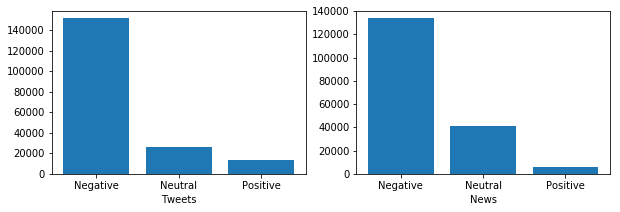

In [8]:
plt.figure(figsize=(10, 3))
plt.subplot('121')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent.iloc[:,1:4].sum())
plt.xlabel('Tweets')
plt.subplot('122')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent_news.iloc[:,1:4].sum())
plt.xlabel('News')

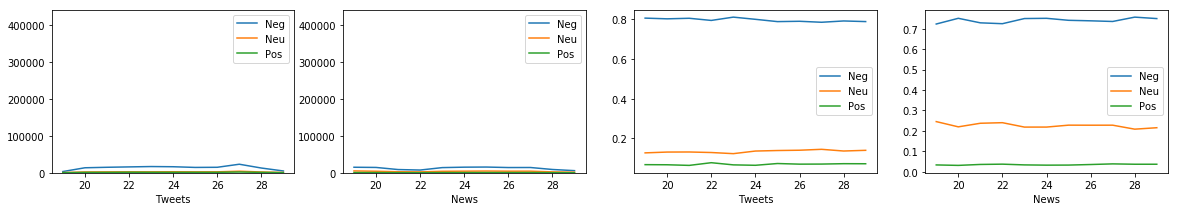

In [9]:
plt.figure(figsize=(20, 3))
plt.subplot('141')
plt.plot(df_topic_sent.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('142')
plt.plot(df_topic_sent_news.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('143')
day = df_topic_sent.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('144')
day = df_topic_sent_news.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])

In [10]:
for df in [df_topic_sent,df_topic_sent_news]:
    t = df.iloc[:,1:4].sum()
    print((t[2]-t[0])/(t.sum()))

-0.7241553175732811
-0.7073471017546973


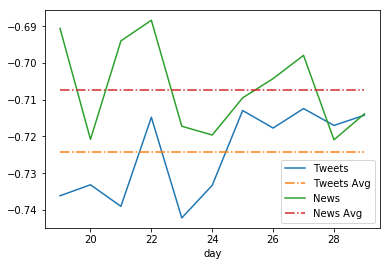

In [11]:
# Overall all sentiment score against each day
tweets_sent = df_topic_sent.groupby('day').sum()
((tweets_sent[2]-tweets_sent[0])/tweets_sent['total']).plot()
plt.plot(dates,[-0.7241553175732811 for d in dates], linestyle="-." )
news_sent = df_topic_sent_news.groupby('day').sum()
((news_sent[2]-news_sent[0])/news_sent['total']).plot()
plt.plot(dates,[-0.7073607721322387 for d in dates], linestyle="-." )
plt.legend(['Tweets','Tweets Avg','News','News Avg'])

# Topic Count of each Sentiment

Text(0.5,0,'News')

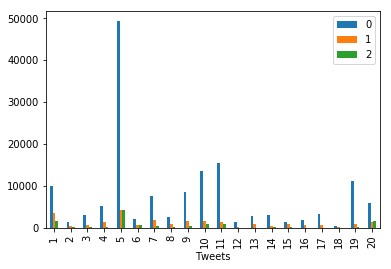

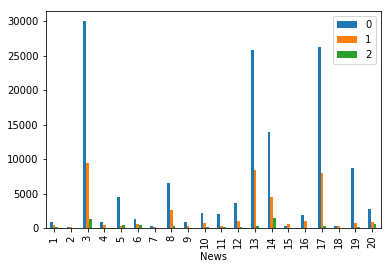

In [12]:
#由于存在无法map topics 和 sent的，所以现在tweets和new数量不一致
plt.figure(figsize=(10, 3))
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('Tweets')
df_topic_sent_news.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('News')

In [13]:
def multi_subplot(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(3):
        plt.subplot(f'14{i+1}')
        count = dfs.groupby('TopicID')[i].sum()
        if d=='bar':
            count.plot.bar()
        elif d=='pie':
            count.sort_index().plot.pie()
    #     plt.legend(loc='best', shadow=True)
        plt.title('Topics Count when sentiment is '+ str(i))
    plt.subplot(f'144')
    topic_total = dfs.groupby('TopicID').sum()
    ((topic_total[2]-topic_total[0])/topic_total['total']).plot.bar()
#     dfs.groupby('TopicID')['TopicScore'].sum().plot.bar()
    plt.title('Topics Sentiment Scores')

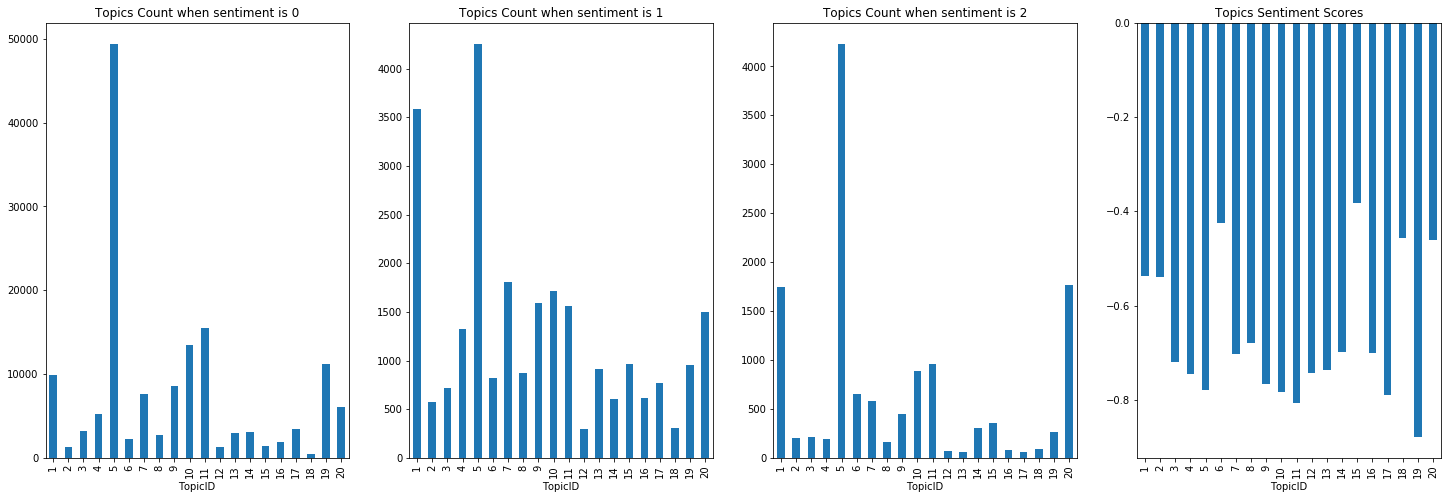

In [14]:
multi_subplot(w=25,h=8,dfs=df_topic_sent)

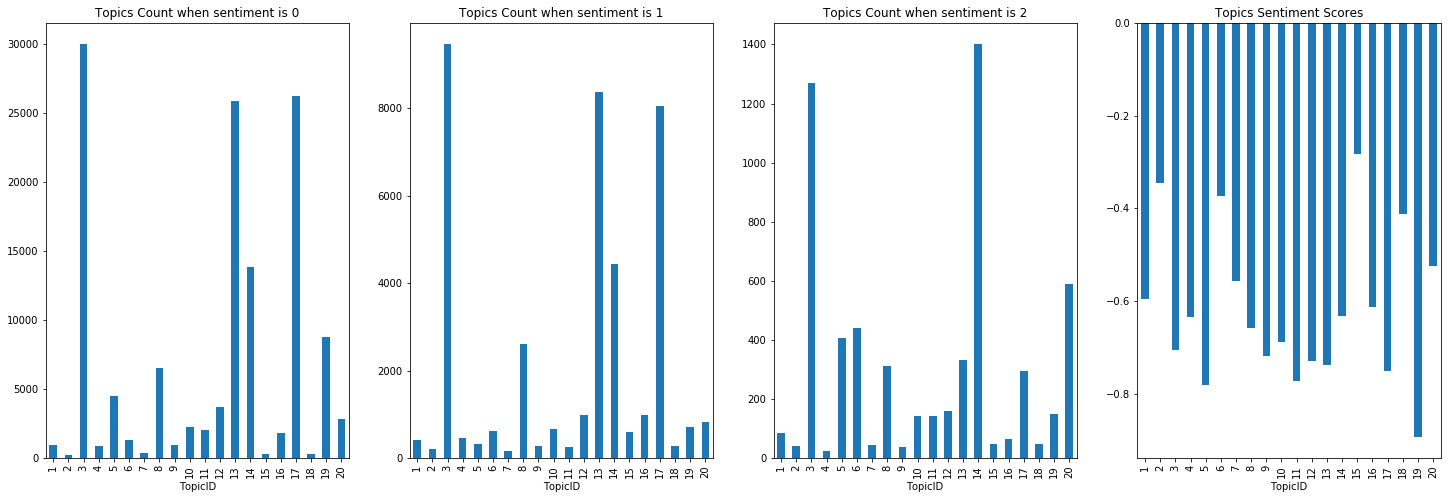

In [15]:
multi_subplot(w=25,h=8,dfs=df_topic_sent_news)

In [16]:
def multi_subplot20(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(7):
        for j in range(3):
            plt.subplot2grid((7,3), (i,j))
            count = dfs[dfs.day==dates[i]][j]
            if d=='bar':
                pic=count.plot.bar()
                plt.xticks(range(20),range(1,21))
            elif d=='pie':
                pic=count.sort_index().plot.pie(labels=range(1,21))
#                 plt.legend(range(1,21))
#             pic.set_ylim(0,120000)
            plt.title('Topics Count when sentiment is '+ str(j))
            plt.ylabel(f'Day {i+1}')

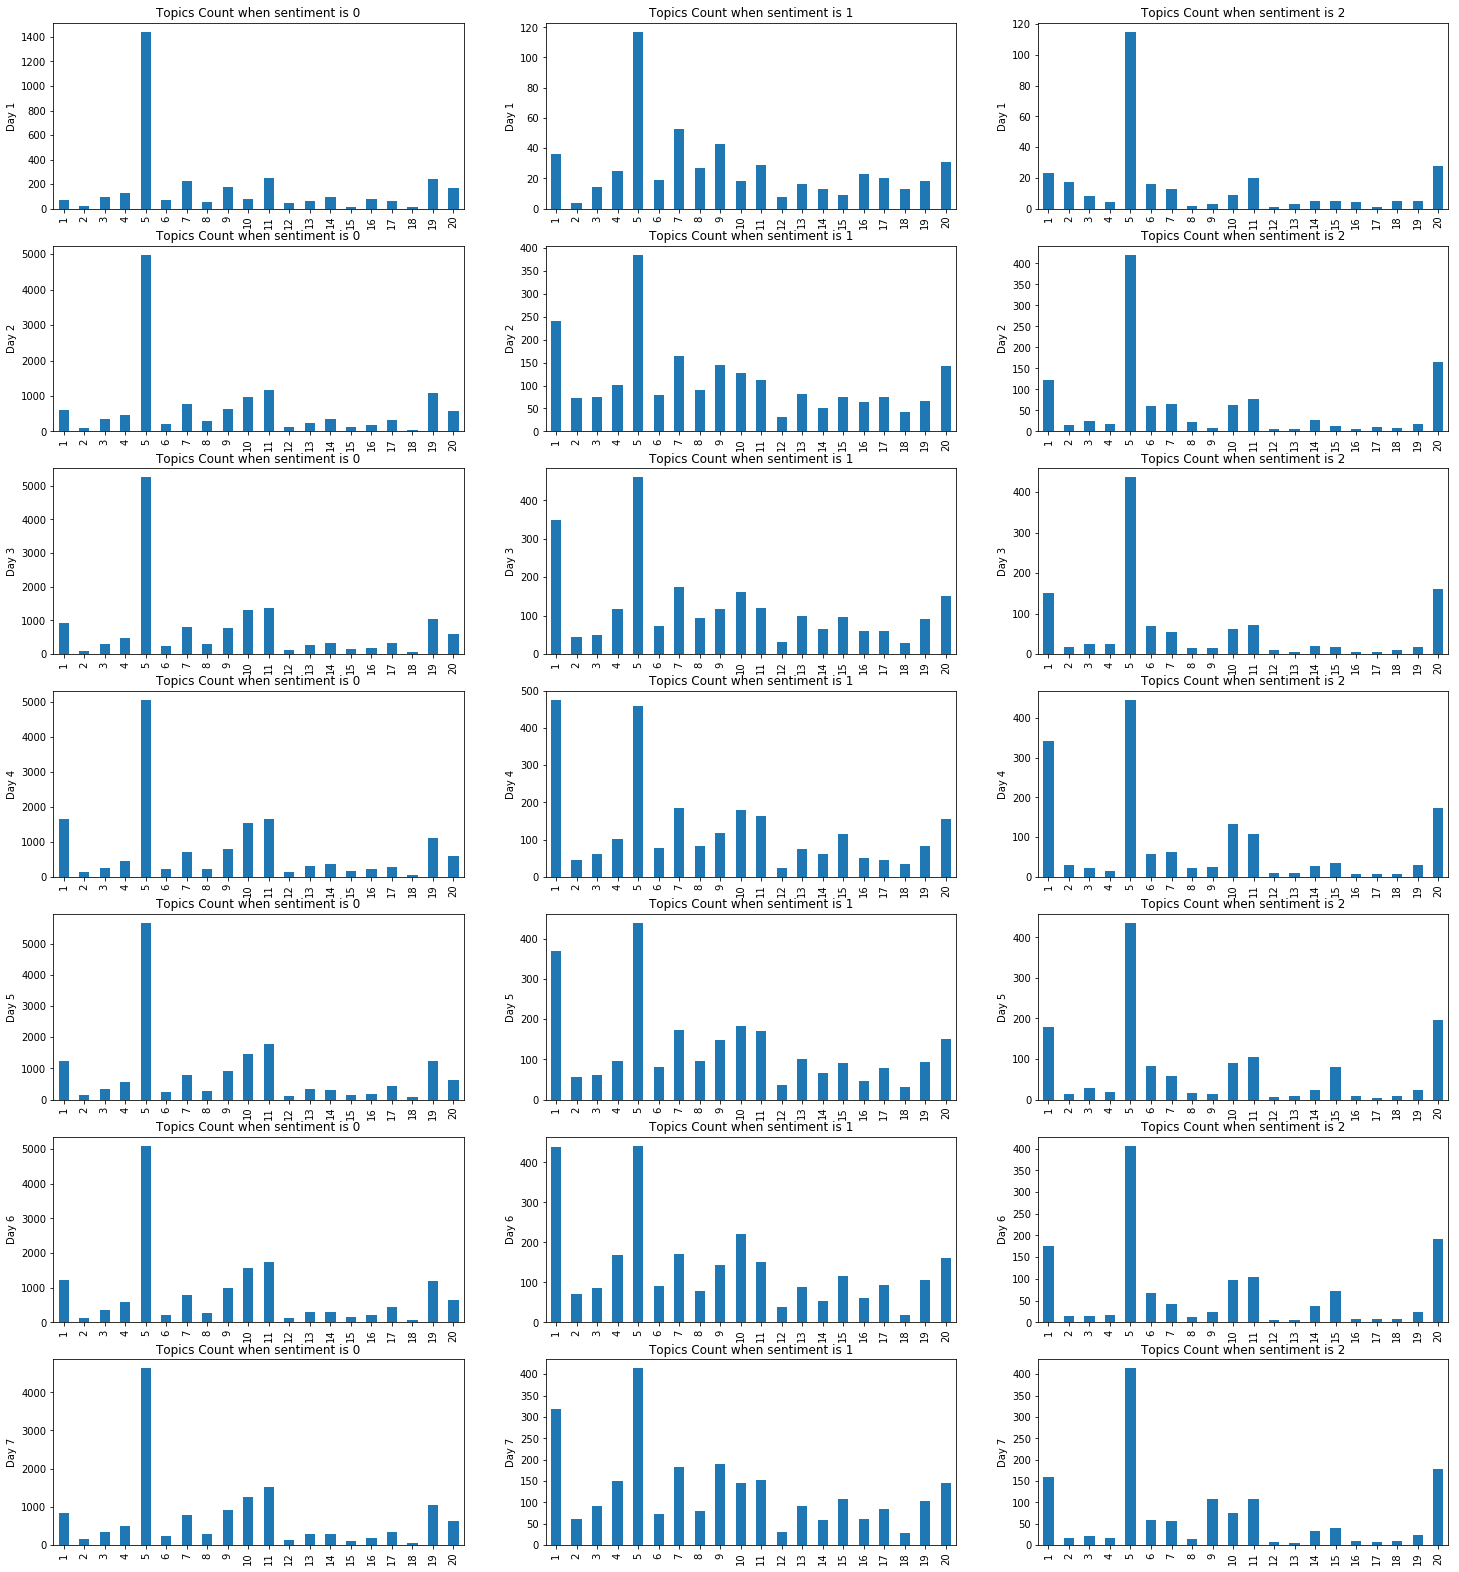

In [17]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent)

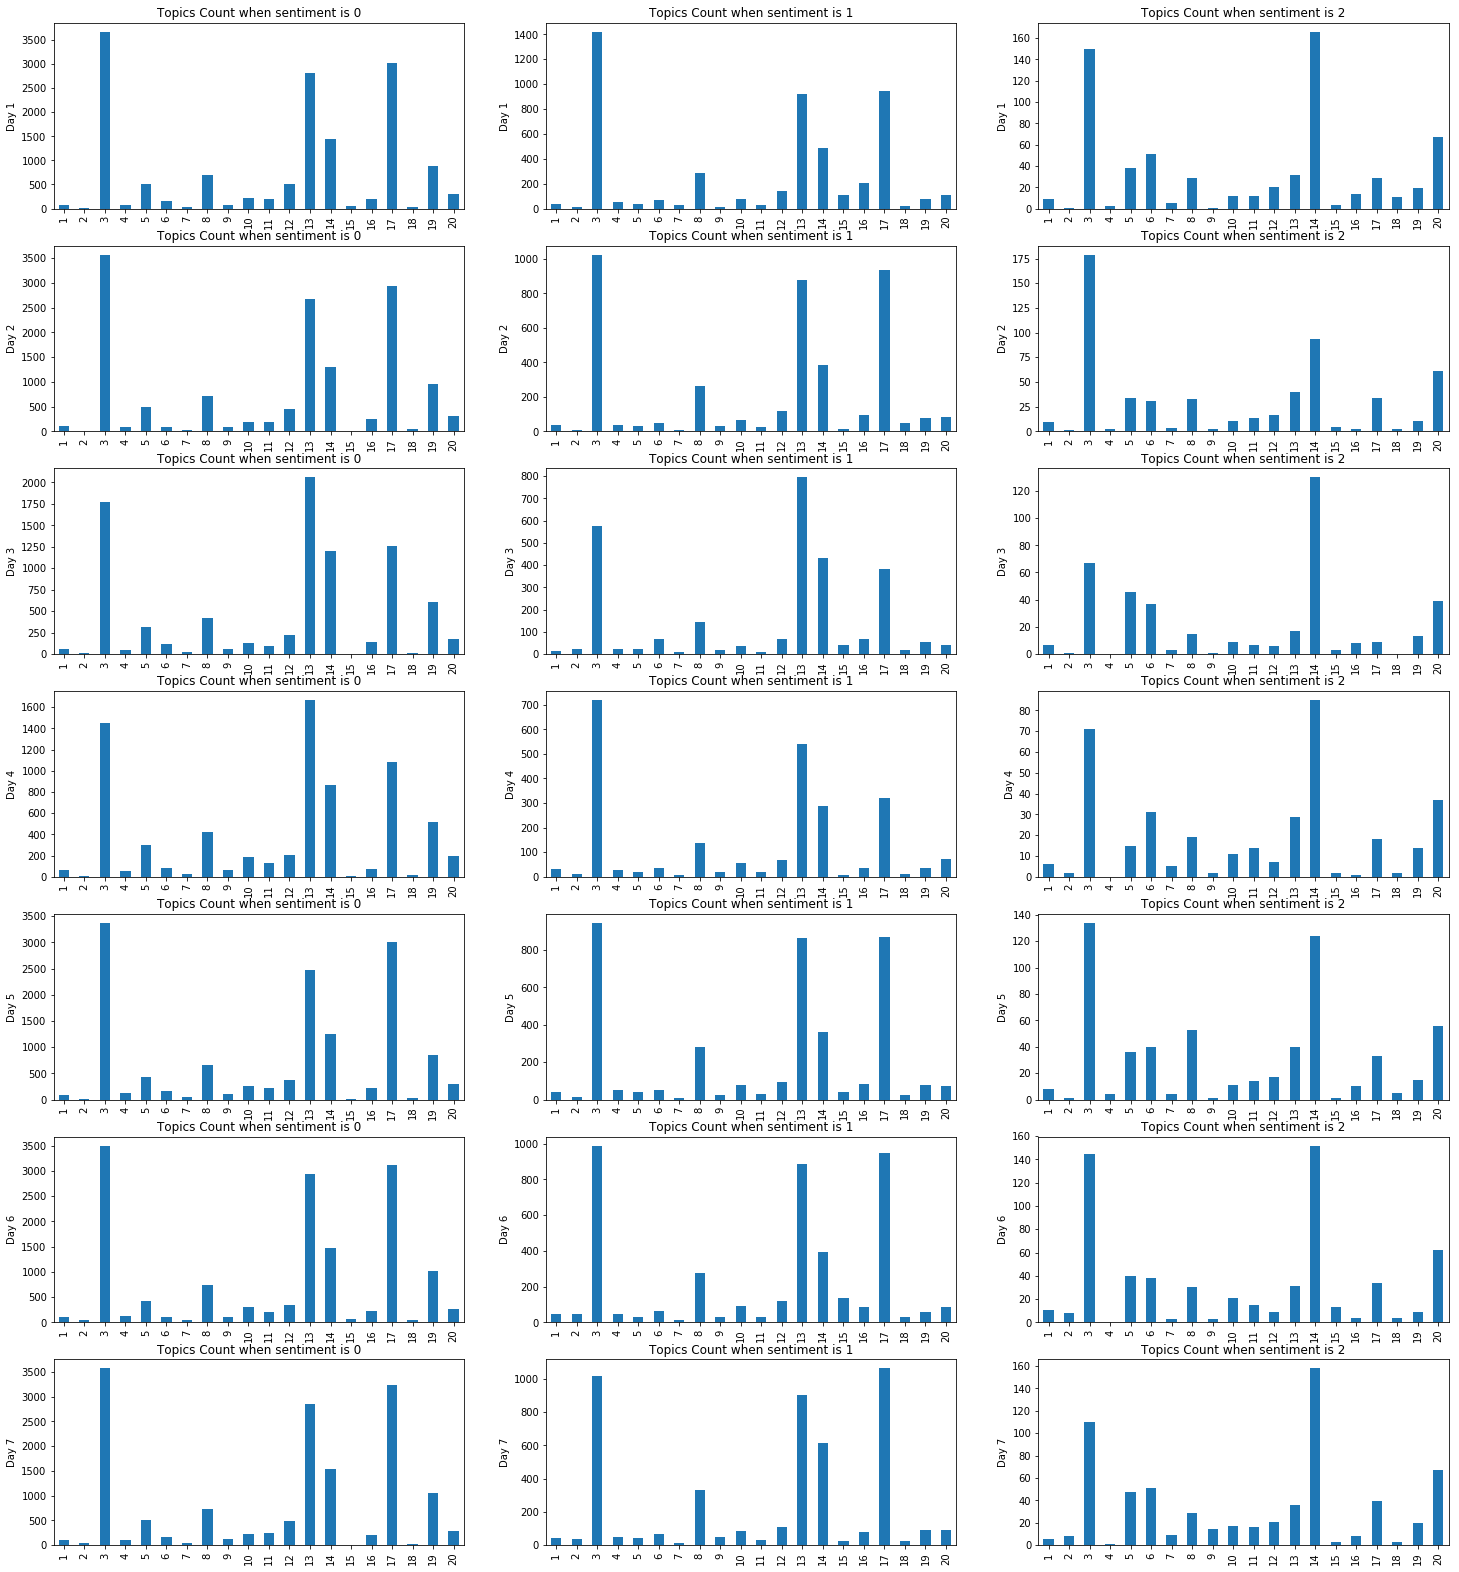

In [18]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent_news)

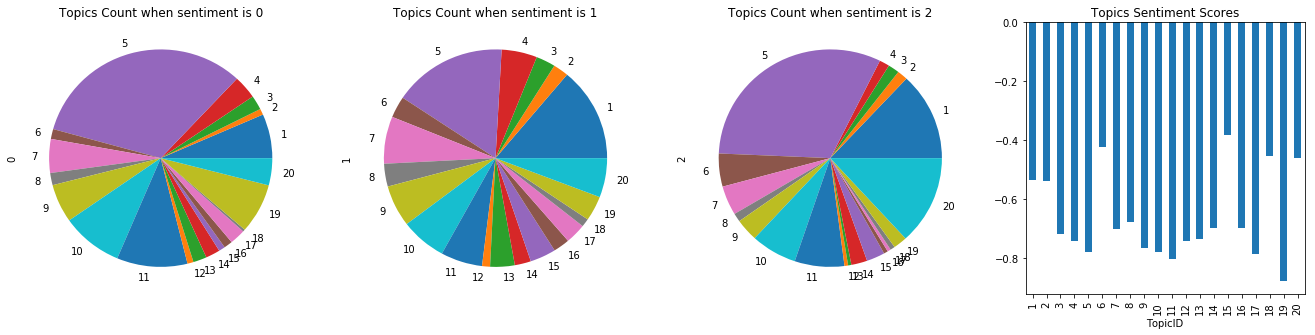

In [19]:
multi_subplot(w=23,h=5,d='pie')

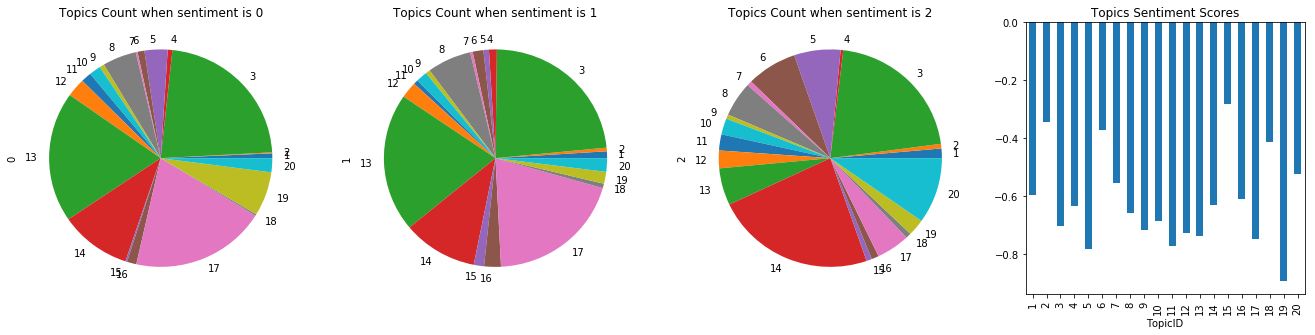

In [20]:
multi_subplot(w=23,h=5,d='pie',dfs=df_topic_sent_news)

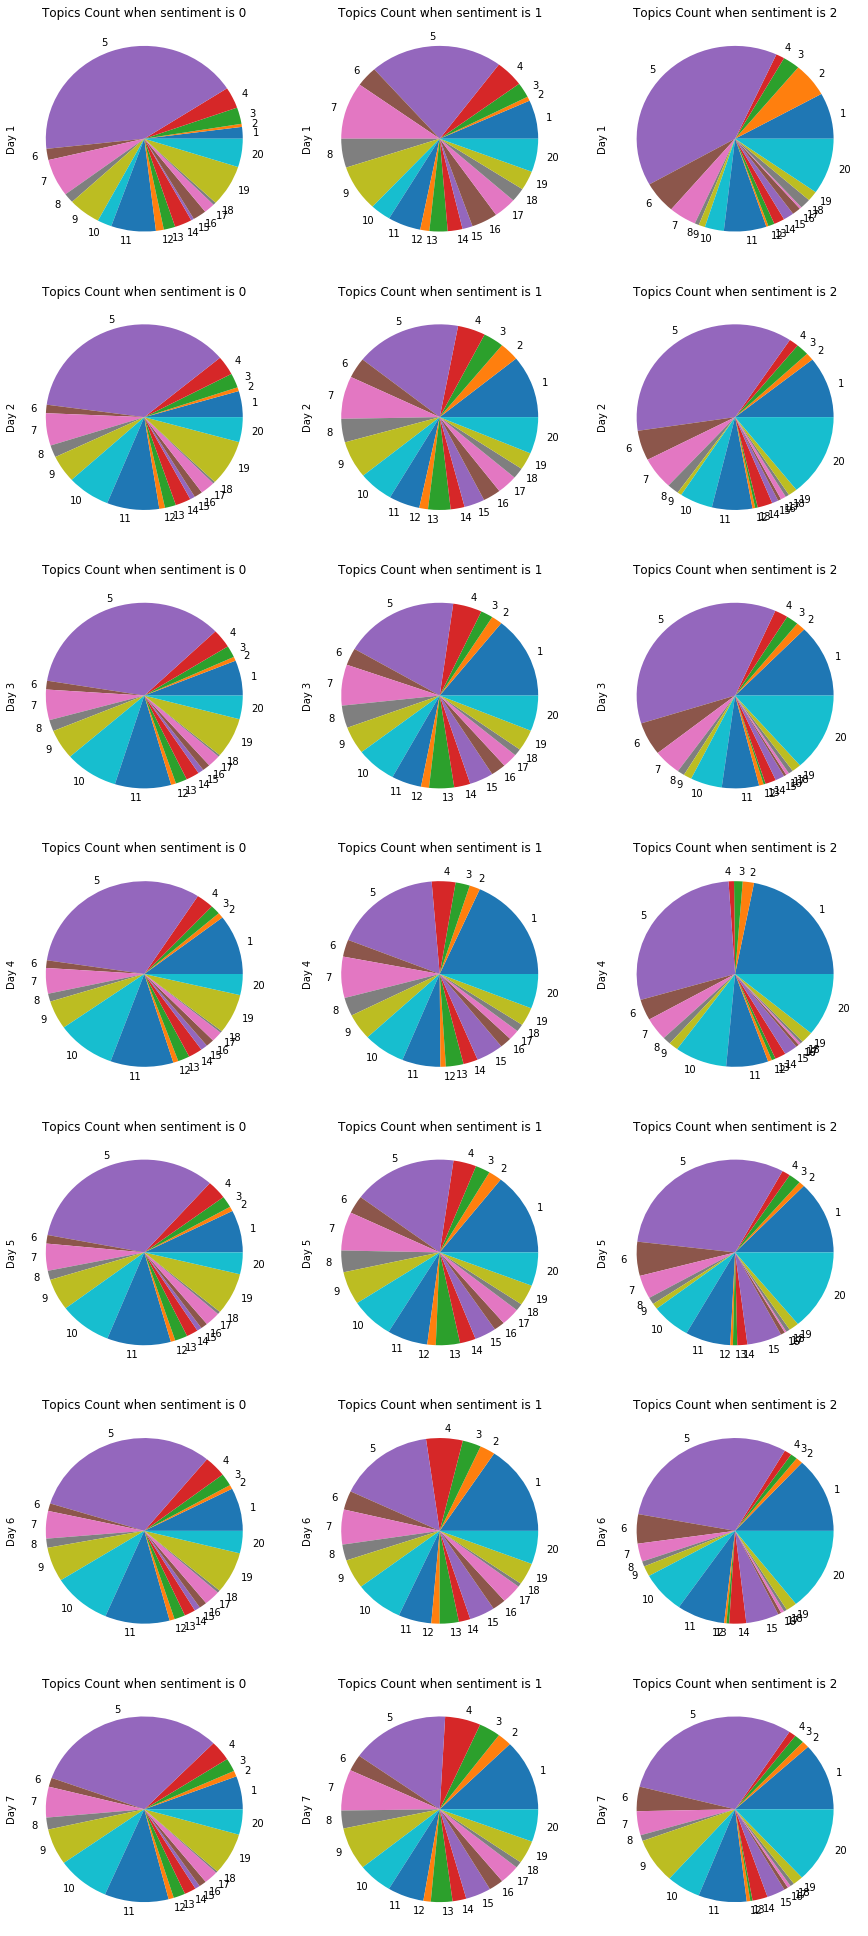

In [21]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent)

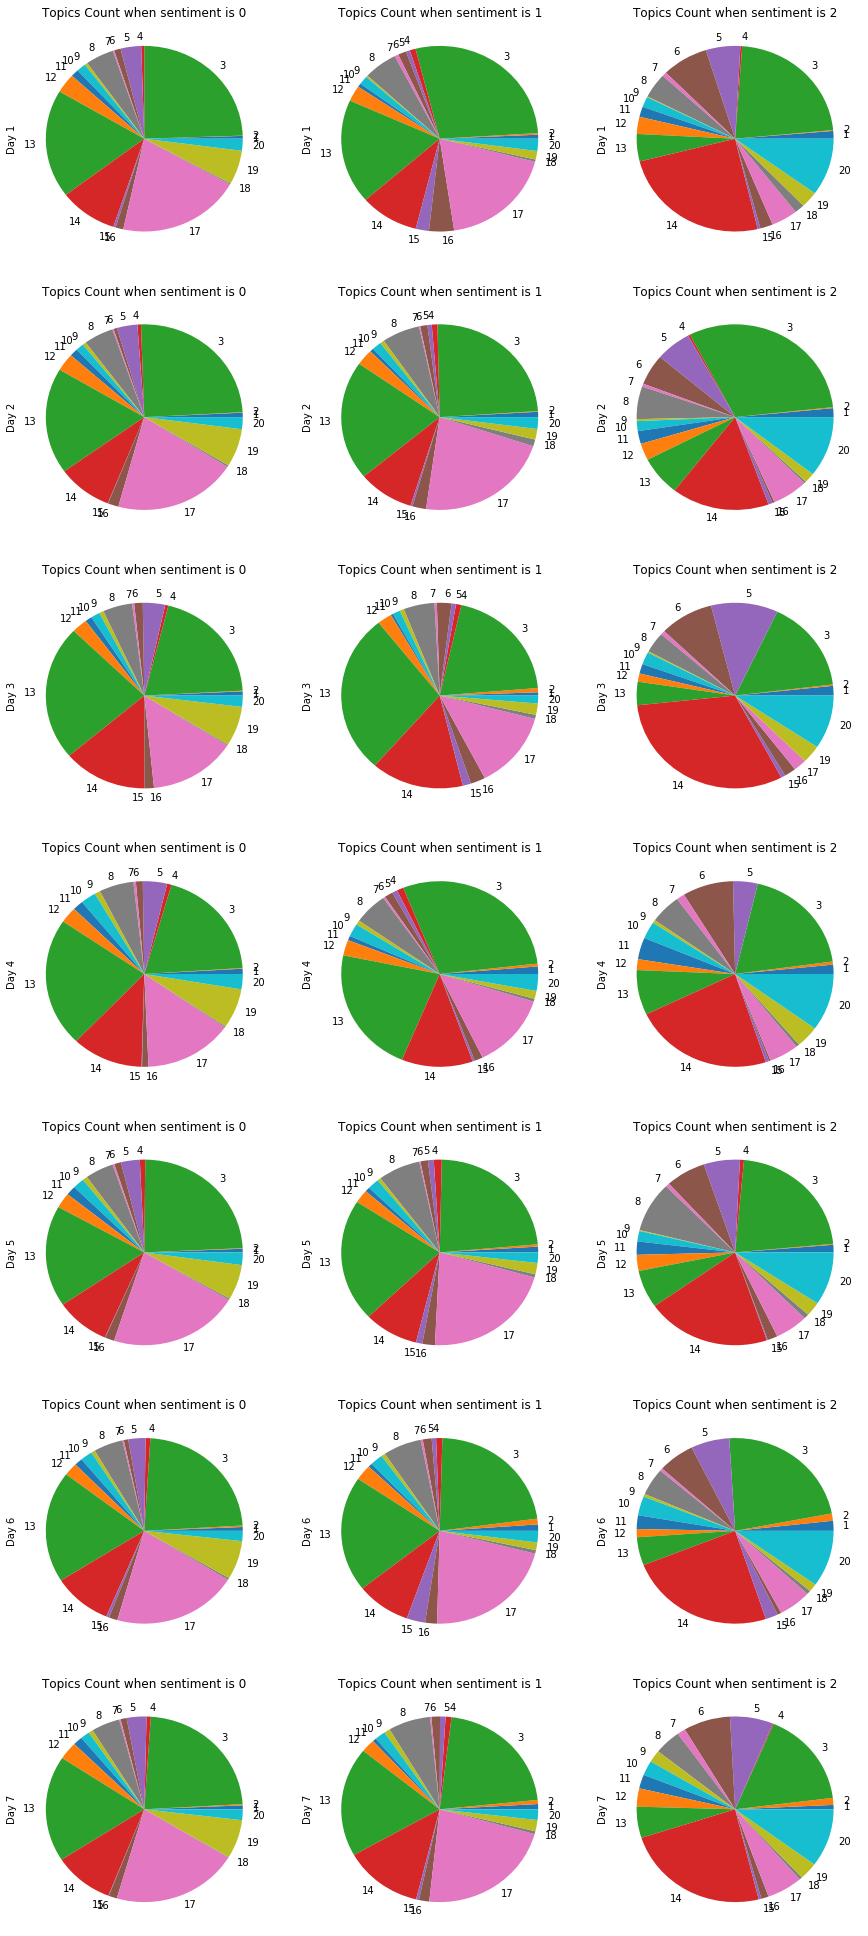

In [22]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent_news)

# Data Reduction & Relative Value

In [23]:
df_topic_sent.head(3) # Flat table

TopicID   0   1   2  day  total  TopicScore
0        1  69  36  23   19    128   -0.359375
1        2  18   4  17   19     39   -0.025641
2        3  97  14   8   19    119   -0.747899

In [24]:
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(pd.concat([x[0],x[1],x[2]],axis=1).values))),index=dates).head(3)

1              2              3               4   \
19     [69, 36, 23]    [18, 4, 17]    [97, 14, 8]    [125, 25, 4]   
20  [615, 242, 122]   [91, 72, 15]  [340, 75, 24]  [452, 101, 18]   
21  [913, 348, 151]  [105, 44, 18]  [304, 49, 24]  [488, 116, 26]   

                  5              6               7              8   \
19  [1442, 117, 115]   [66, 19, 16]   [221, 53, 13]    [57, 27, 2]   
20  [4992, 386, 421]  [199, 79, 60]  [763, 165, 64]  [287, 91, 22]   
21  [5252, 460, 437]  [227, 73, 69]  [791, 174, 54]  [292, 95, 14]   

                9                10               11            12  \
19    [179, 43, 3]      [80, 18, 9]    [248, 29, 20]    [44, 8, 1]   
20   [642, 144, 8]   [958, 128, 62]  [1164, 113, 76]  [127, 32, 5]   
21  [773, 117, 16]  [1303, 162, 62]  [1373, 120, 73]  [121, 32, 9]   

               13             14             15            16             17  \
19    [64, 16, 3]    [96, 13, 5]     [16, 9, 5]   [75, 23, 4]    [61, 20, 1]   
20   [246, 82, 5]  [345, 51, 28]  [113, 75, 12]  [186, 65, 6]  [327, 75, 10]   
21  [280, 100, 4]  [326, 65, 21]  [139, 96, 18]  [186, 60, 5]   [317, 61, 6]   

             18              19               20  
19  [16, 13, 5]    [243, 18, 5]    [167, 31, 28]  
20  [47, 42, 7]  [1080, 67, 17]  [588, 142, 164]  
21  [47, 30, 9]  [1041, 90, 18]  [610, 151, 162]

In [25]:
#每天的每个sentiment 的所有topic 之和
df_topic_sent.groupby('day').sum().iloc[:,1:4]

0     1     2
day                   
19    3384   536   287
20   13562  2227  1146
21   14888  2443  1196
22   15904  2592  1565
23   16873  2575  1400
24   16360  2799  1333
25   14508  2567  1363
26   14871  2654  1335
27   23115  4286  2099
28   12882  2230  1192
29    4899   873   453

In [26]:
#每天的每个topic 的三种sentiment之和
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['total']))),index=dates)

1    2    3     4     5    6     7    8     9     10    11   12   13  \
19   128   39  119   154  1674  101   287   86   225   107   297   53   83   
20   979  178  439   571  5799  338   992  400   794  1148  1353  164  333   
21  1412  167  377   630  6149  369  1019  401   906  1527  1566  162  384   
22  2475  223  340   572  5960  345   956  325   932  1852  1912  168  391   
23  1792  206  424   665  6542  413  1024  384  1090  1727  2040  167  461   
24  1840  202  452   783  5955  376   996  349  1147  1895  1990  180  387   
25  1315  223  448   676  5457  359  1016  395  1210  1479  1785  165  377   
26  1339  272  444   700  5567  339  1028  404  1257  1633  1821  181  386   
27  1943  379  699  1156  8448  609  1560  637  1827  2452  2983  285  651   
28  1403  165  304   622  4671  337   818  295   947  1623  1593  130  344   
29   641   84  105   213  1658  118   298   98   328   681   642   46  151   

     14   15   16   17   18    19    20  
19  114   30  102   82   34   266   226  
20  424  200  257  412   96  1164   894  
21  412  253  251  384   86  1149   923  
22  457  327  271  340   93  1212   910  
23  411  303  247  503  120  1345   984  
24  388  344  276  528   98  1315   991  
25  369  265  248  426   81  1180   964  
26  389  277  250  423   84  1170   896  
27  623  406  369  725  116  2153  1479  
28  326  233  217  343   76  1038   819  
29  147   79   88  121   25   428   274

In [27]:
# 每个topic的每种sentiment一周之和
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].T

TopicID    1     2     3     4      5     6     7     8     9      10     11  \
0        9931  1358  3209  5218  49394  2228  7604  2733  8630  13513  15463   
1        3591   577   724  1328   4255   820  1808   873  1588   1718   1557   
2        1745   203   218   196   4231   656   582   168   445    893    962   

TopicID    12    13    14    15    16    17   18     19    20  
0        1333  2969  3145  1393  1884  3448  505  11198  6090  
1         298   916   605   969   612   774  313    954  1502  
2          70    63   310   355    80    65   91    268  1768

In [28]:
def getRatio(df_topic_sent):
    sent_day,sent_topic = {},{}
    for sent in range(3):
        sent_day[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates).T
        for d in dates:
            sent_day[sent][d] = sent_day[sent][d]/df_topic_sent.groupby('day').sum().iloc[:,1:4][sent][d] 
                                                #在当天所有相同sentiment 下的和（aggregate topic）
        sent_topic[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates)
        for t in range(1,21):
            sent_topic[sent][t] = sent_topic[sent][t]/df_topic_sent.groupby('TopicID').sum().iloc[:,sent][t] 
                                        #在一周所有相同sentiment下的和(aggregate day)
    return sent_day,sent_topic

In [29]:
def ratioSent(df_topic_sent):
    sent_day,sent_topic = getRatio(df_topic_sent)
    plt.figure(figsize=(22, 14))
    for sent in range(3):
        plt.subplot(f'23{sent+1}')
        plt.plot(sent_day[sent].T)
#         plt.ylim(0,0.32)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same day)') # 每个日期上的点和为1
        plt.subplot(f'23{sent+4}')
        plt.plot(sent_topic[sent])
#         plt.ylim(0,0.36)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same topic)')#每条topic线条和为1

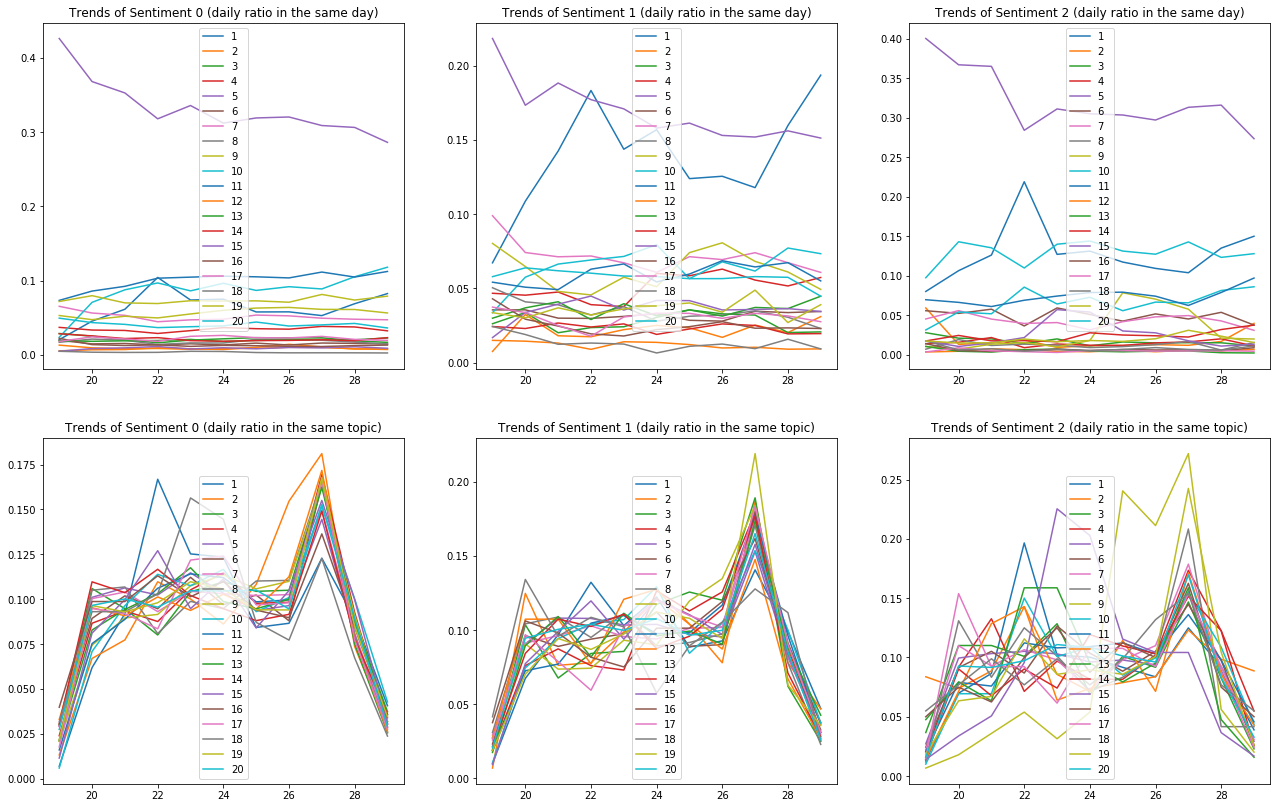

In [30]:
ratioSent(df_topic_sent)

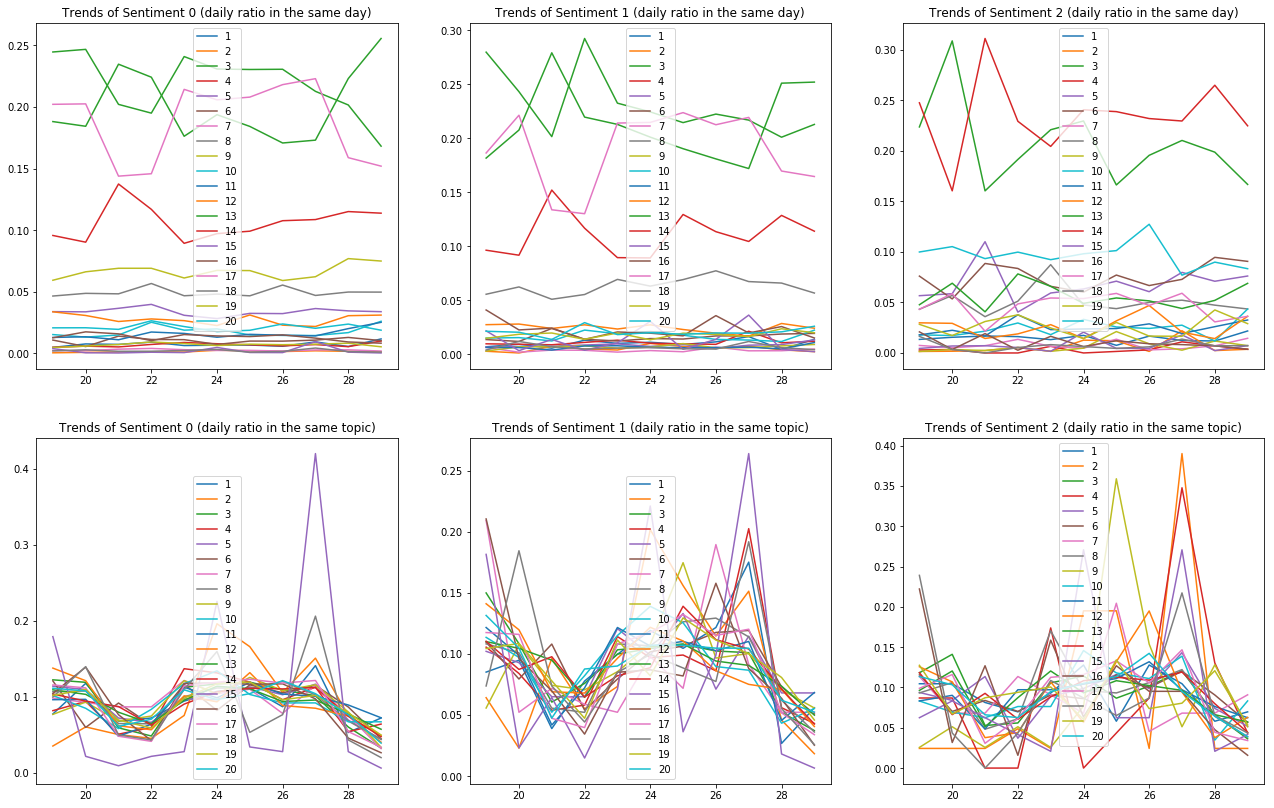

In [31]:
ratioSent(df_topic_sent_news)

In [41]:
def multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=0,maxy='0.38'):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
            for sent in range(3):
                if ratio==0:
                    getRatio(dfs)[ratio][sent].loc[t,:].plot(ylim=(0,maxy))
                else:
                    getRatio(dfs)[ratio][sent].T.loc[t,:].plot(ylim=(0,maxy))
#                     plt.xticks(range(11),dates,rotation=0)
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.title('Sentiment Ratio of Topic '+ str(t))
            t += 1

In [33]:
def topicDailySent(dfs=df_topic_sent):
    plt.figure(figsize=(25, 7))
    for i in range(3):
        sents = dict(dfs.groupby('TopicID').apply(lambda x: list(x[i])))
        count = pd.DataFrame(sents)
        plt.subplot(f'14{i+1}')
        plt.plot(count)
        plt.xticks(range(11),dates,rotation=0)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Sentiment {i} Count against date of each topcis')
    plt.subplot('144')
    plt.plot(pd.DataFrame(dict(dfs.groupby('TopicID').apply(lambda x: list(x['TopicScore'])))))
#     plt.ylim(-0.85,-0.2)
    plt.xticks(range(11),dates,rotation=0)
    plt.legend(range(1,21),loc='best')
    plt.title('Sentiment Score against date of each topcis')

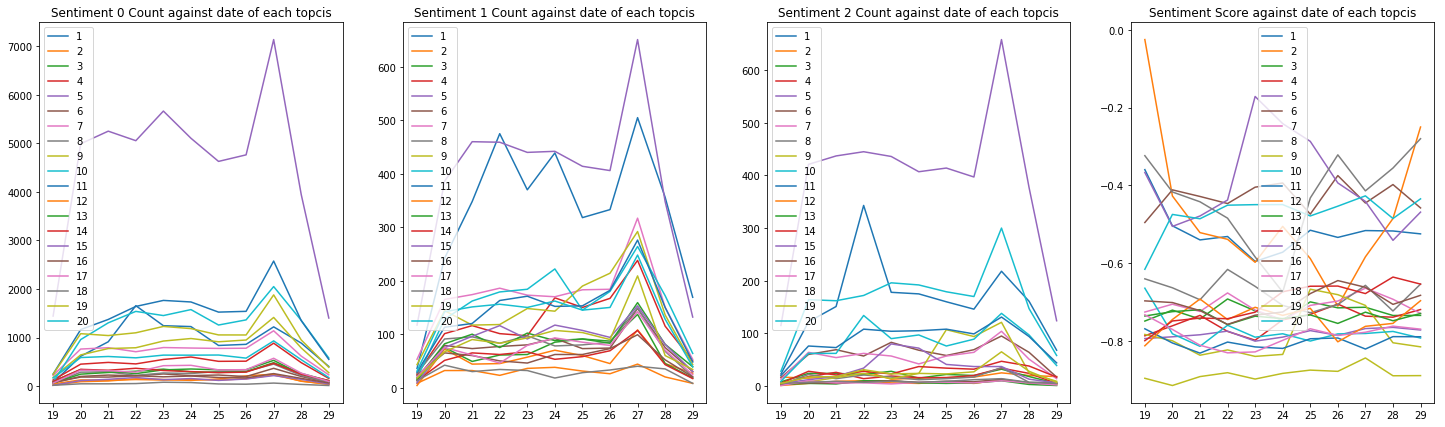

In [34]:
topicDailySent(df_topic_sent)

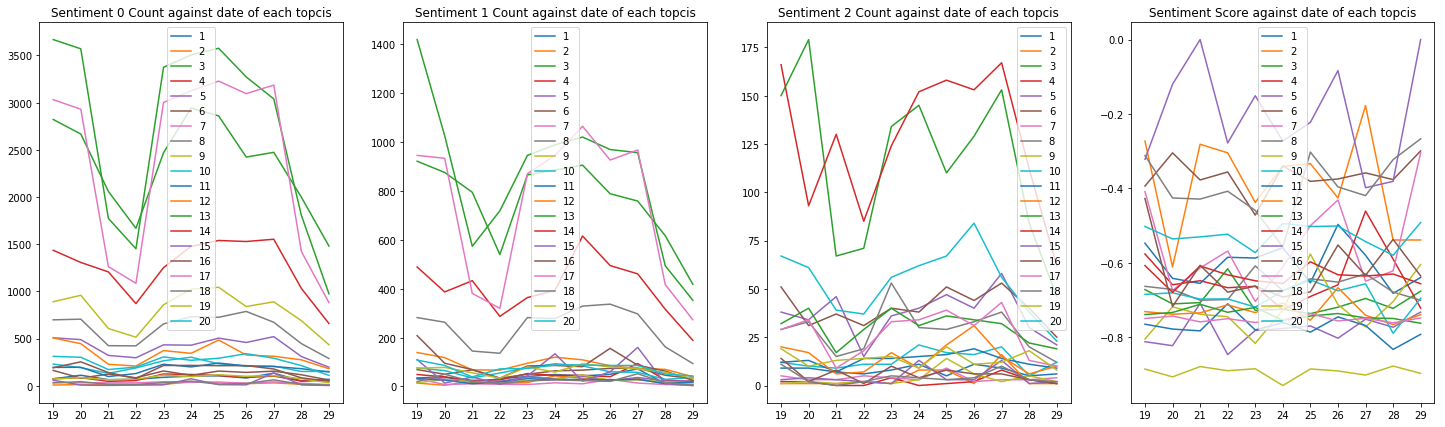

In [35]:
topicDailySent(df_topic_sent_news)

# Sentiment trends against each topic

In [36]:
def multi_subplot_sent(w=15,h=12,dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            for s in range(3):
                pic= pd.Series(dfs.groupby('TopicID').apply(lambda x: list(x[s]))[t]).plot()
#                 pic.set_ylim([0,90000])
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.xticks(range(11),dates,rotation=0)
            plt.title('Sentiment Trend of Topic '+ str(t))
            t += 1

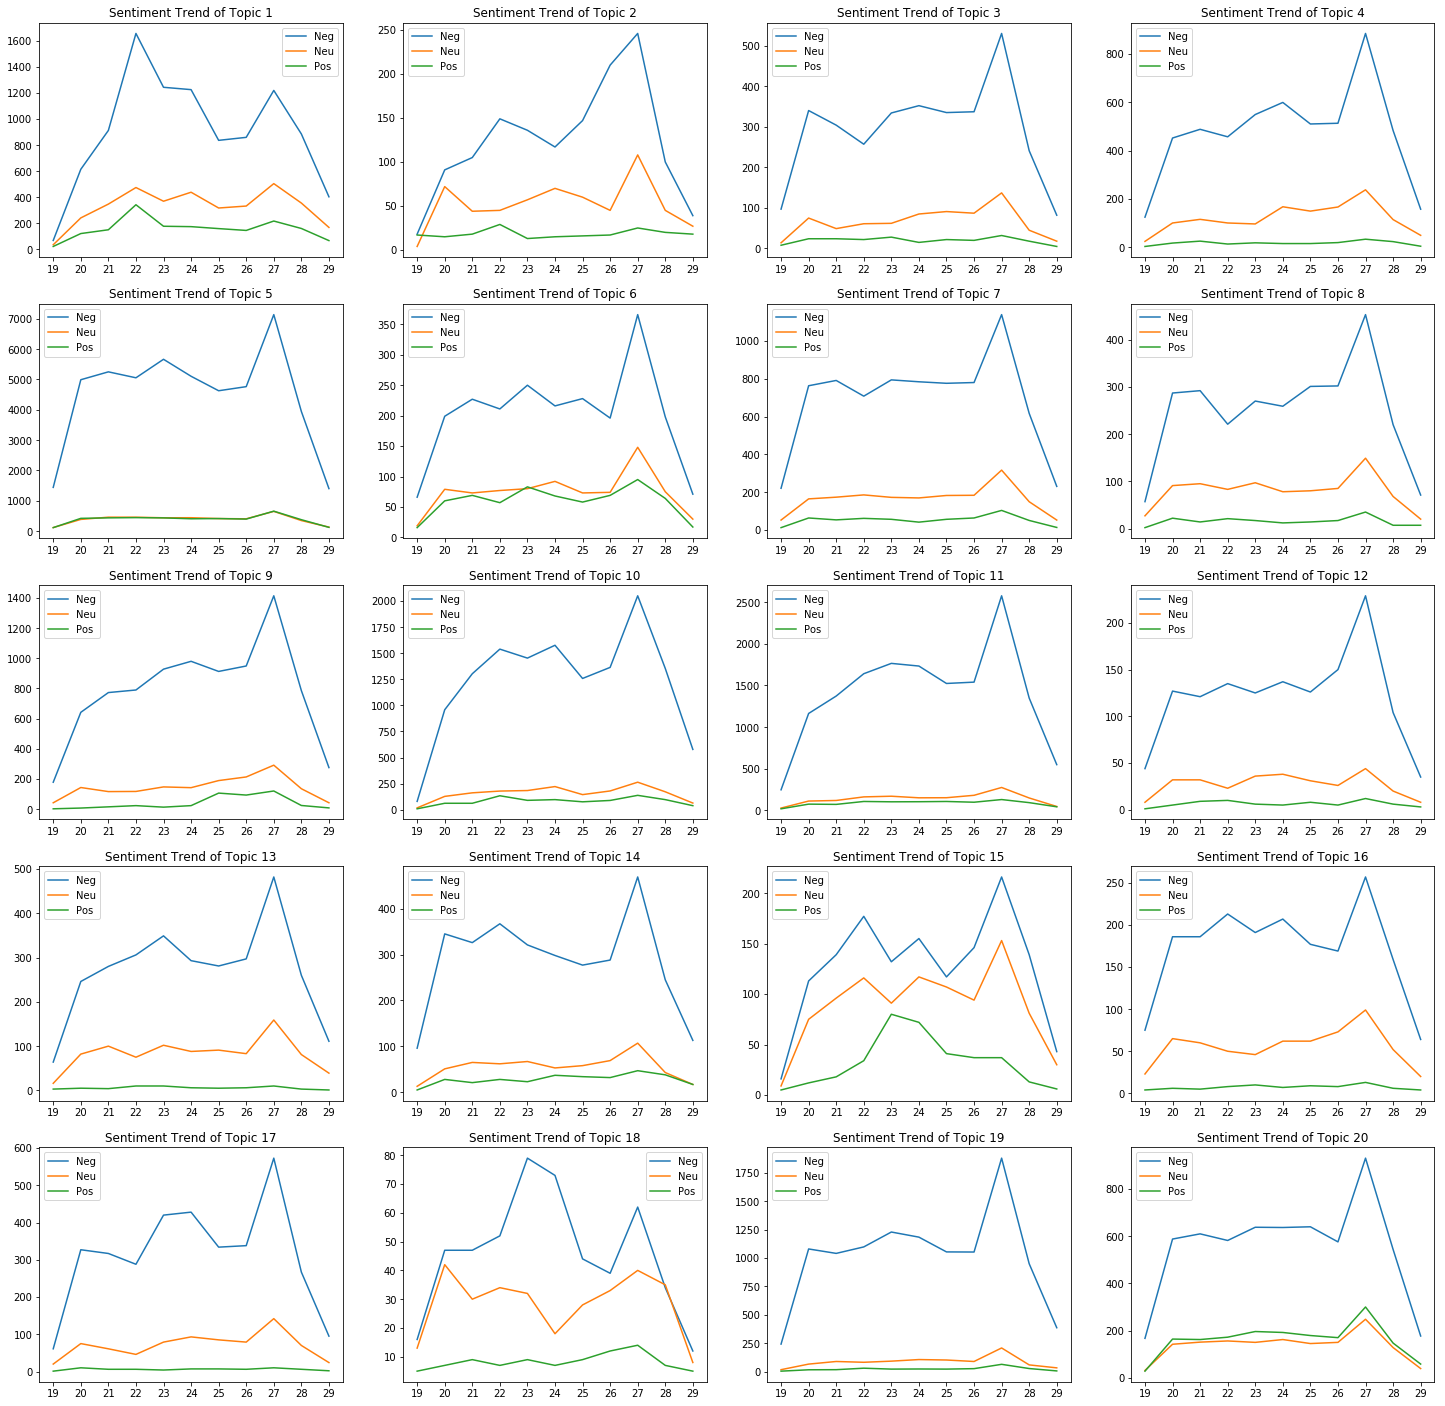

In [37]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent)

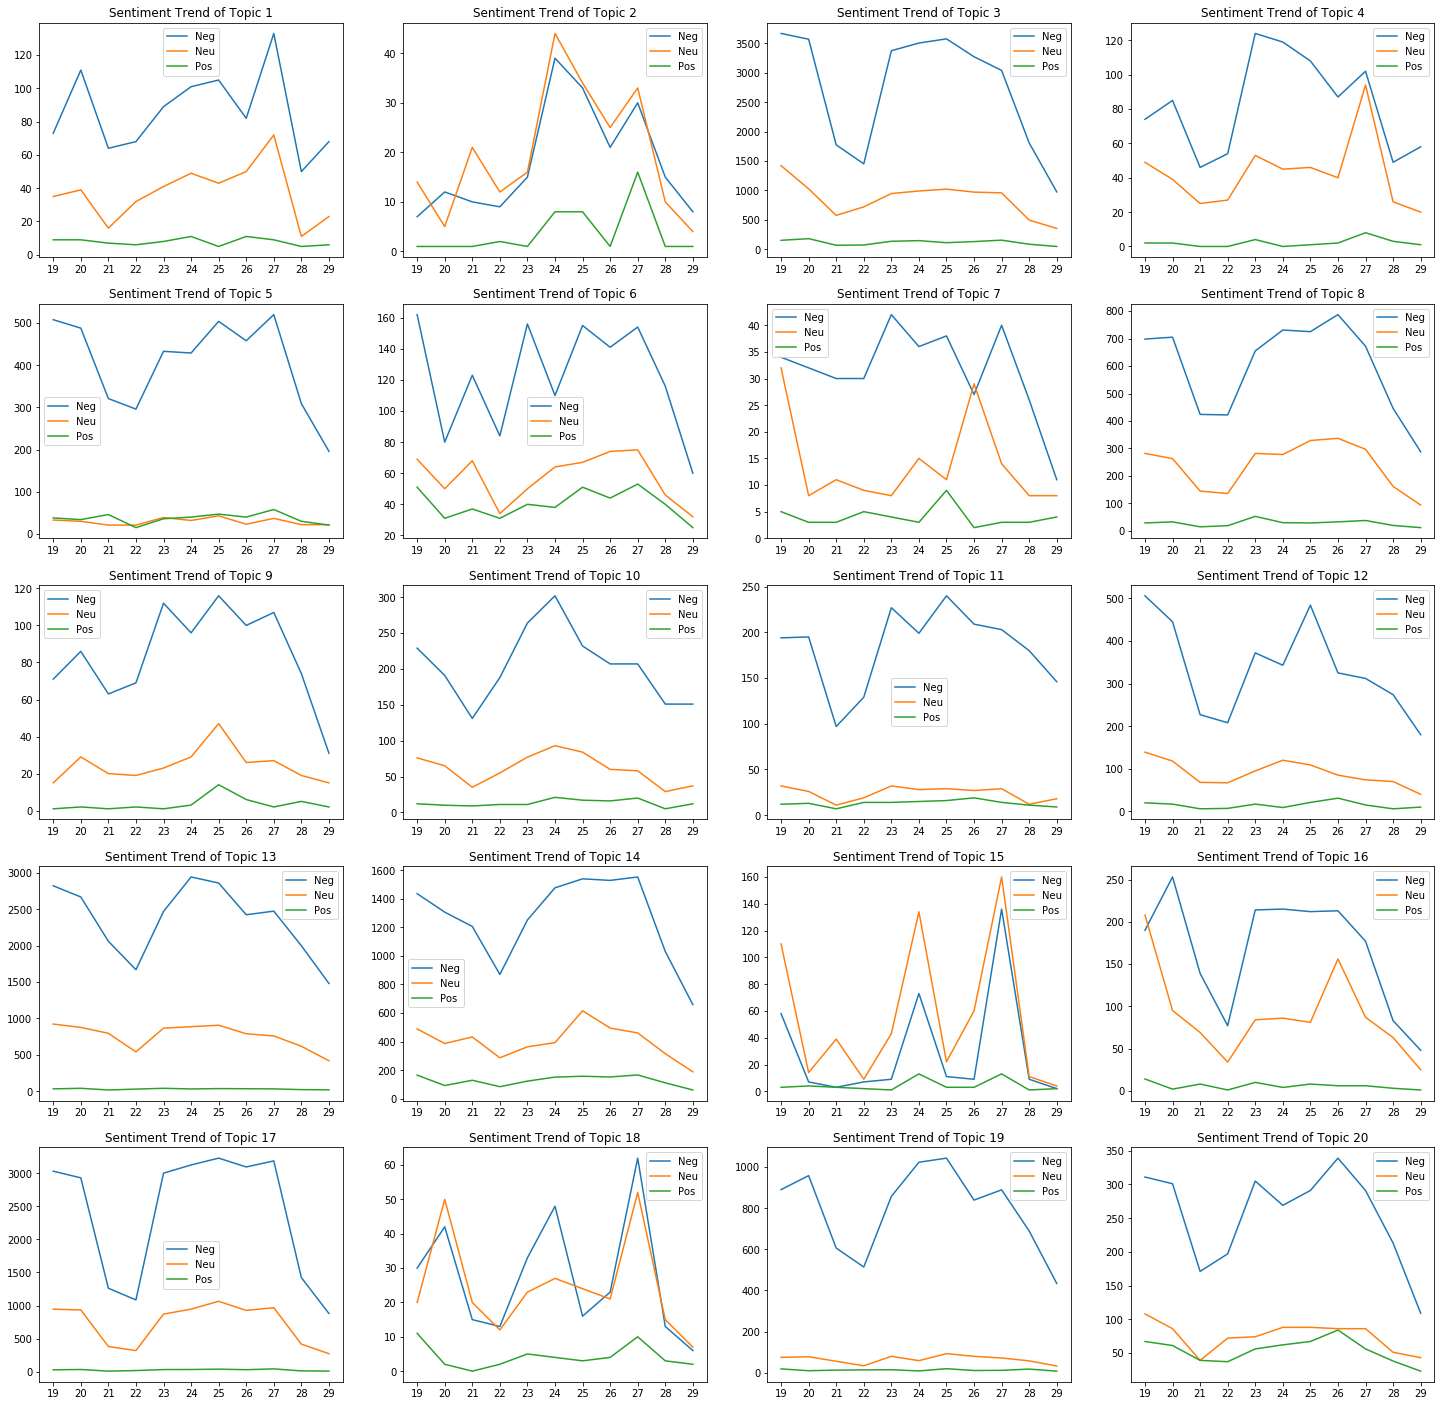

In [38]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent_news)

## Relative value: Ratio based on Topics
For each sentiment in each day, all the values of each topics add up to 1

纵坐标上所有点和为1

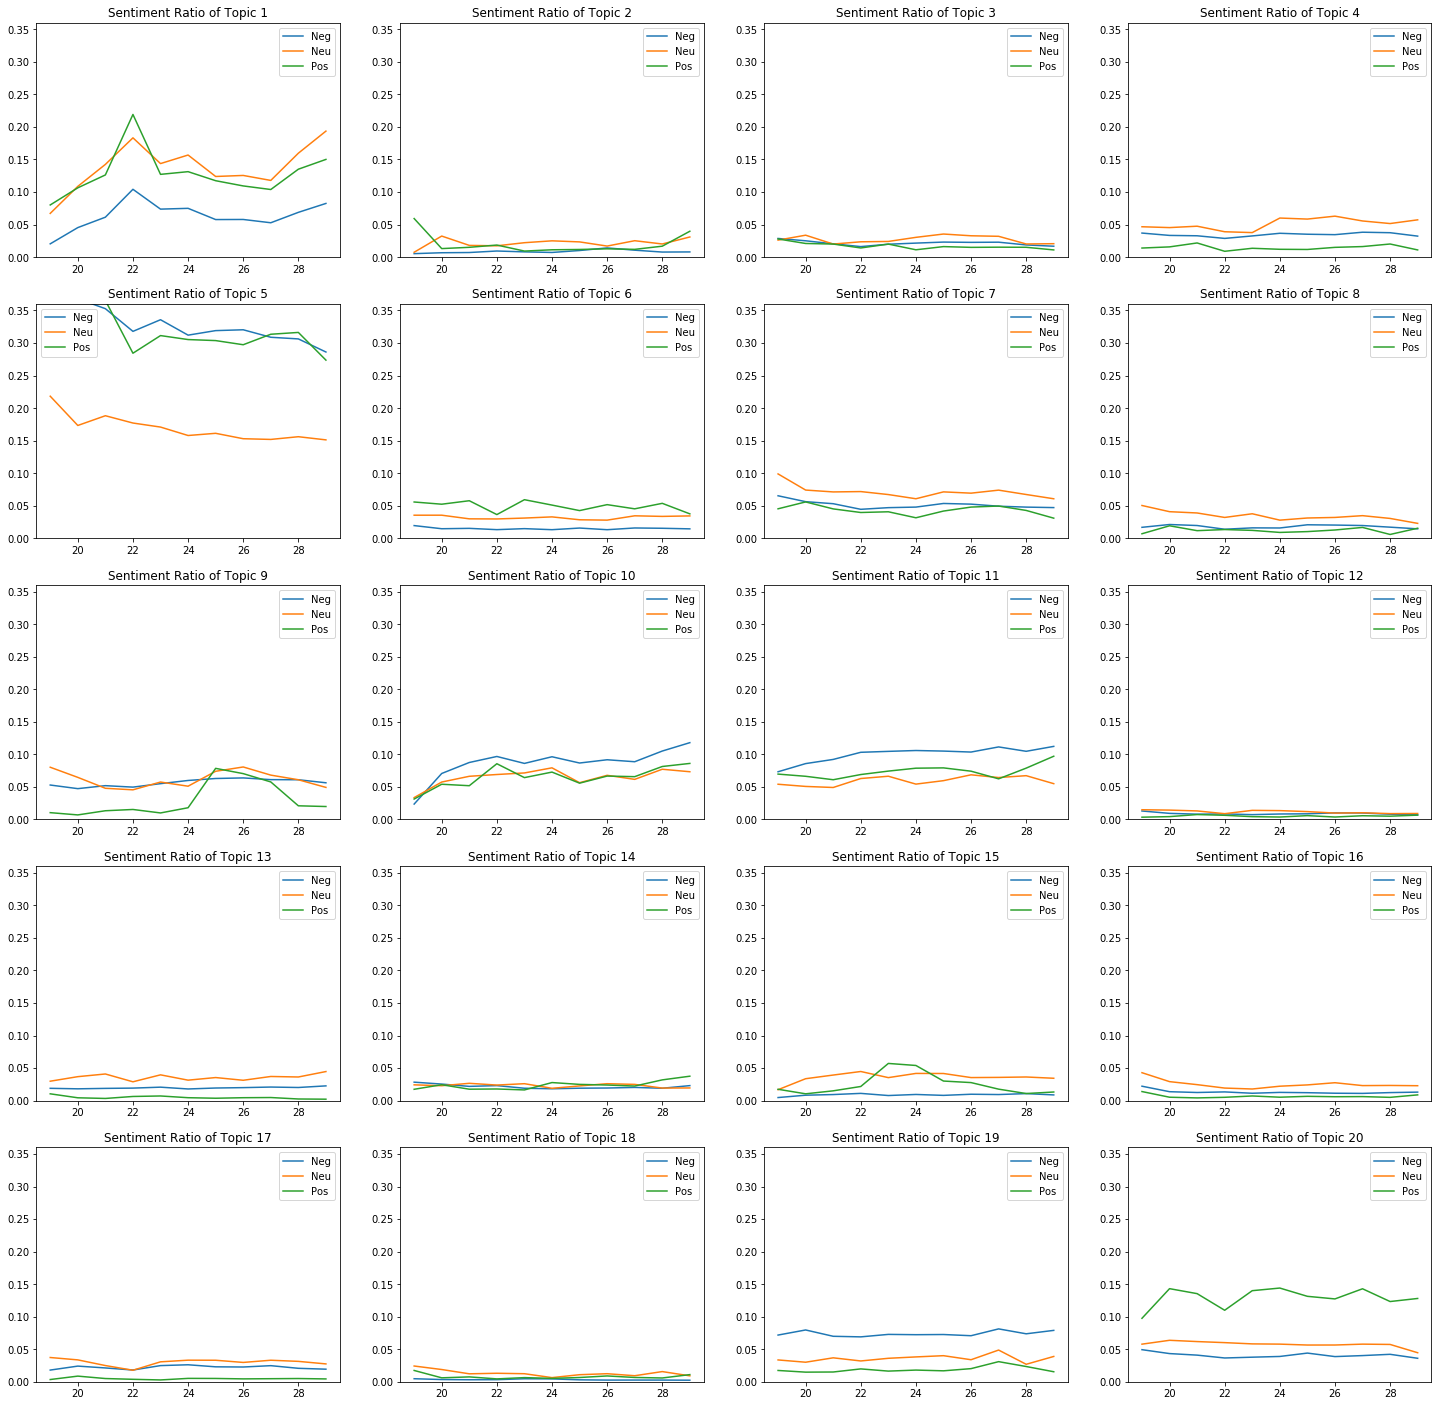

In [39]:
multi_subplot_sentRatio(dfs = df_topic_sent,maxy=0.36)

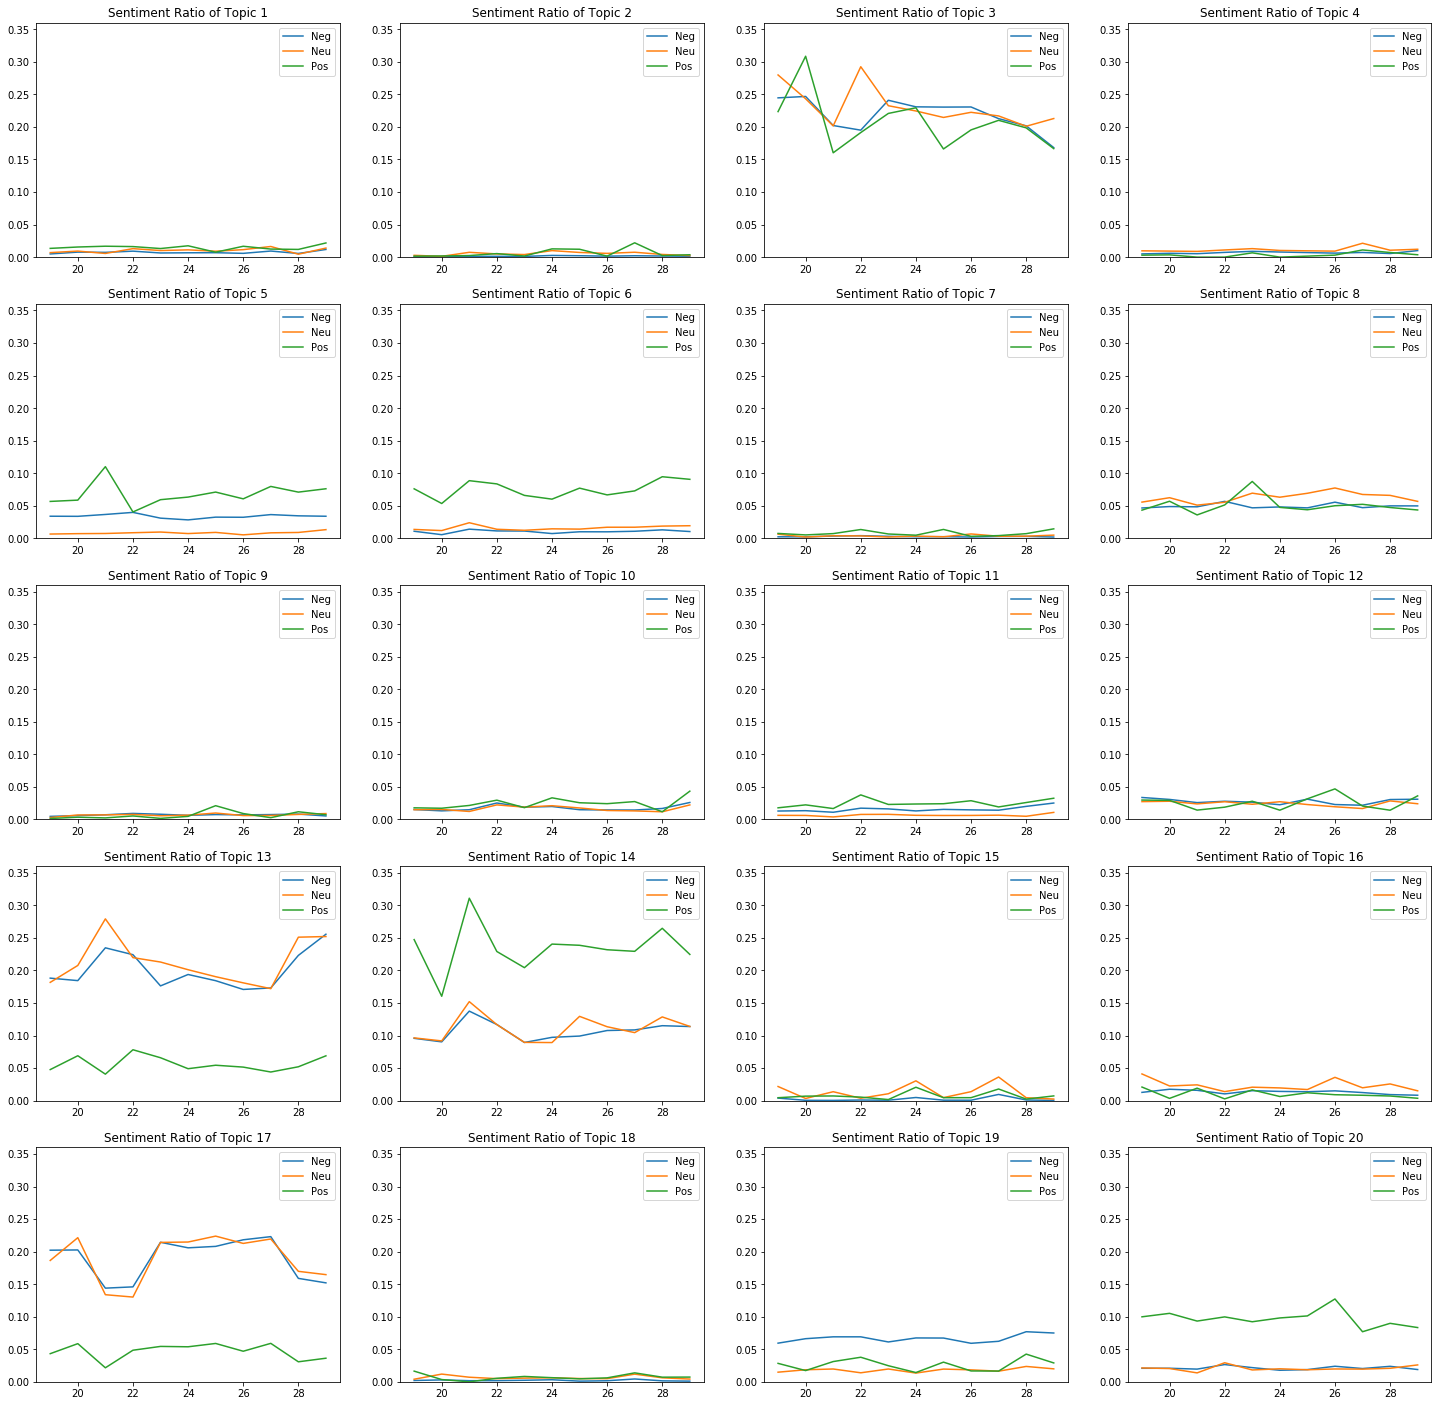

In [40]:
multi_subplot_sentRatio(dfs = df_topic_sent_news, maxy=0.36)

## Relative values: Ratio based on date
For each sentiment in each topic, all the one-week value add up to 1
一条线上所有点和为1

sentiment折线趋近于数量曲线

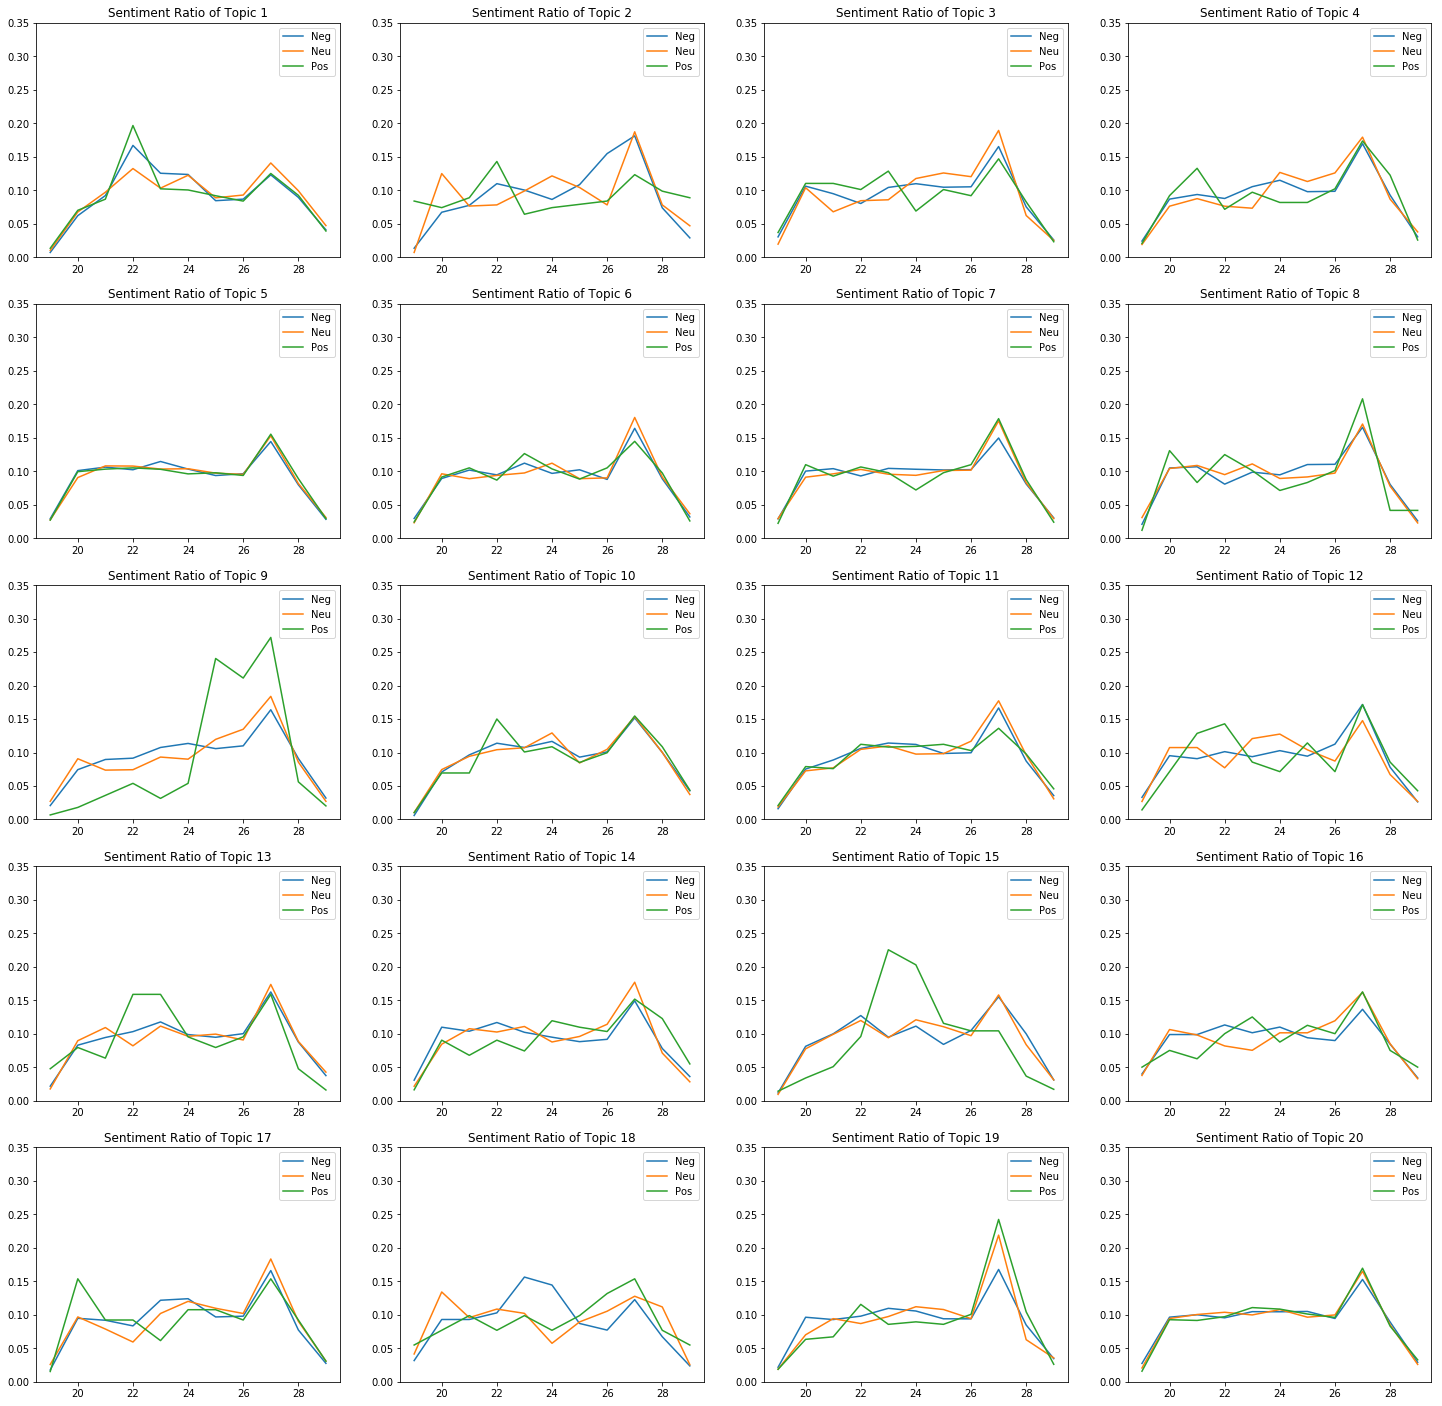

In [43]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=1,maxy=0.35)

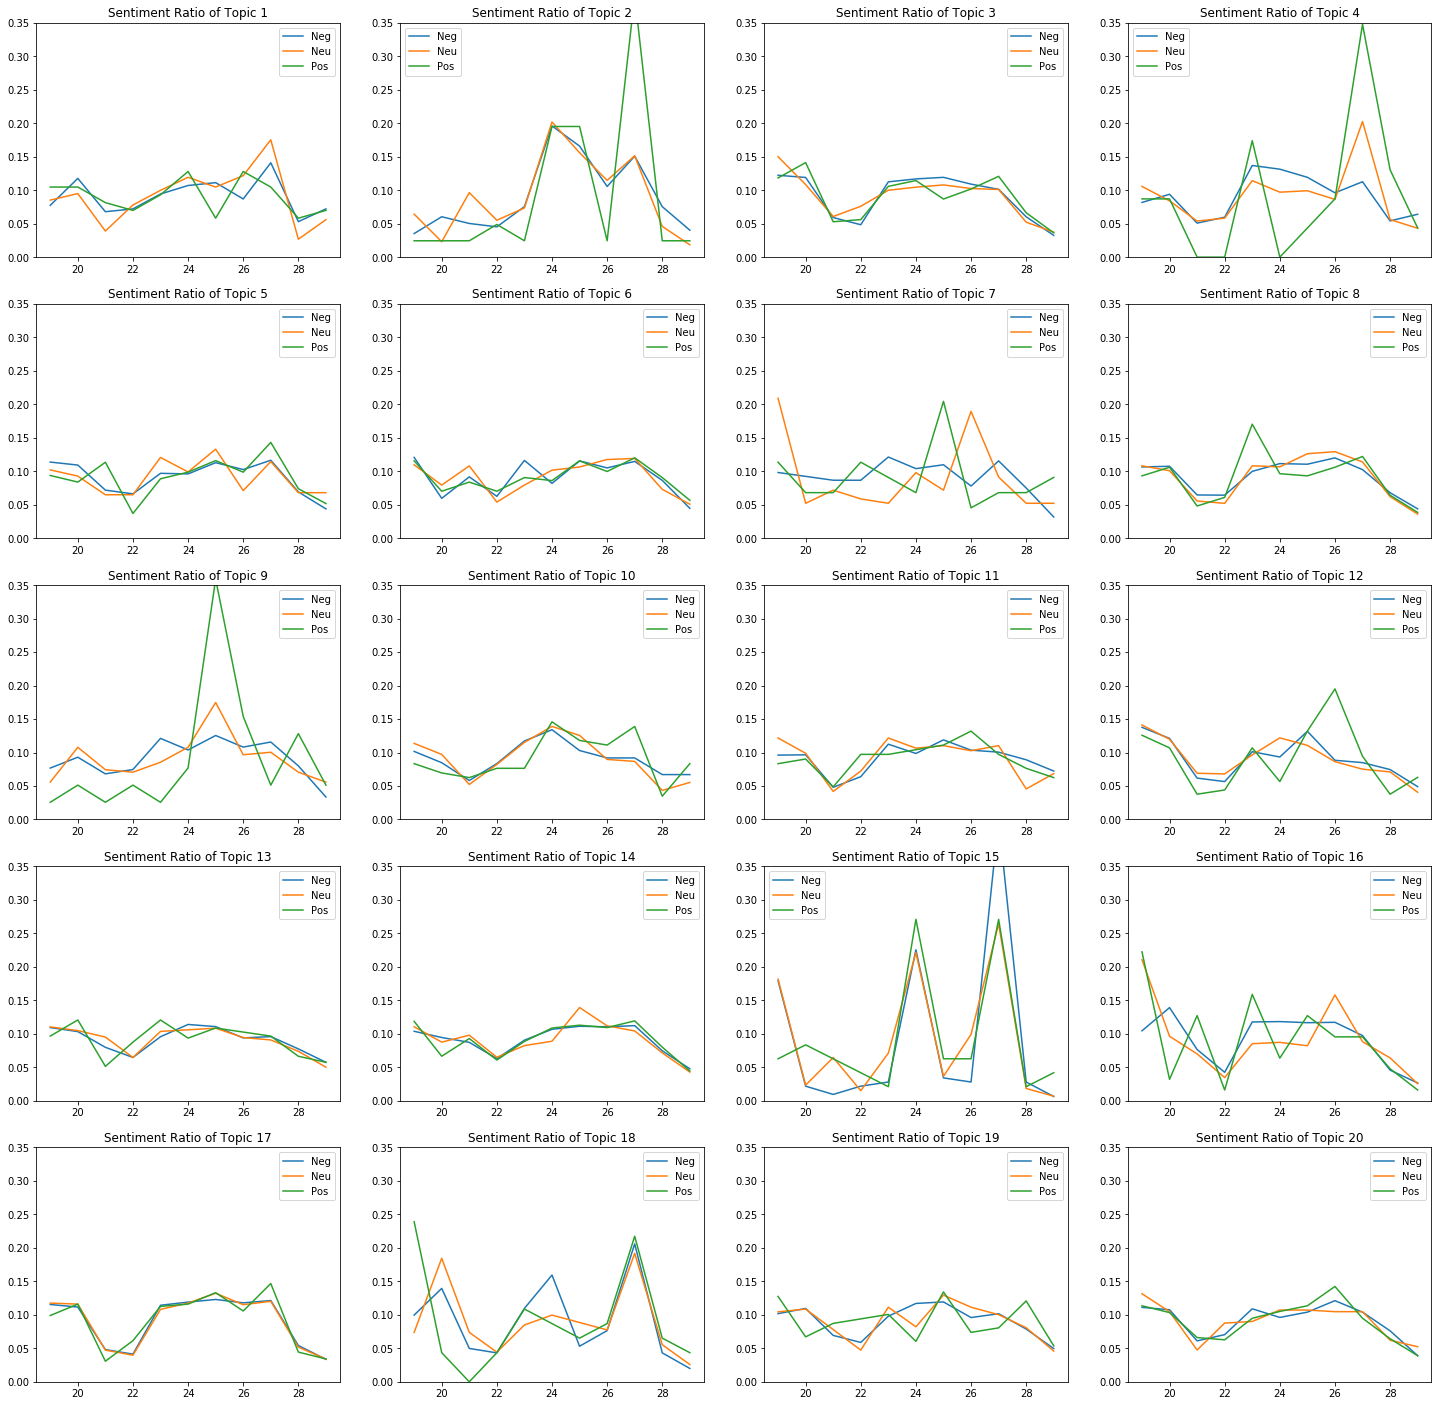

In [44]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent_news,ratio=1,maxy=0.35)

## Sentiment Score

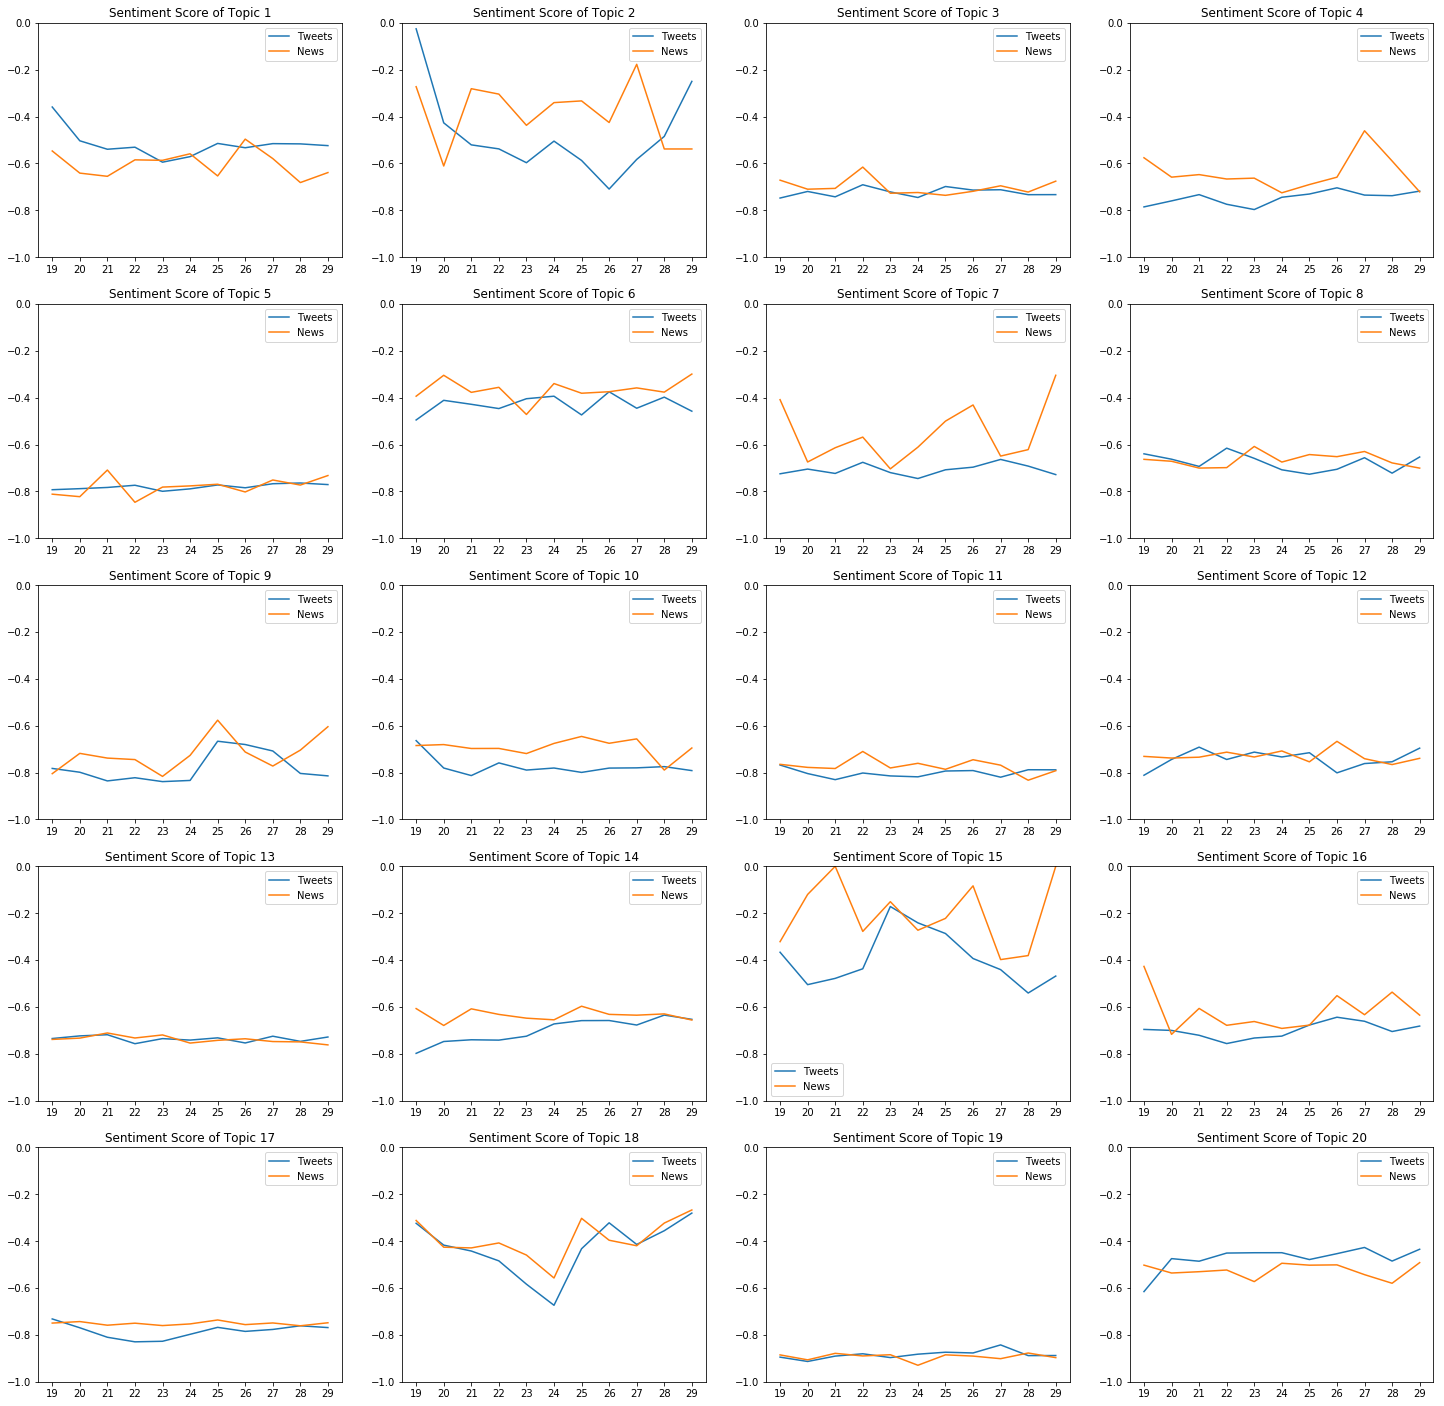

In [48]:
def multi_subplot_sent_score(w=15,h=12):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            pd.Series(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-1,0))
            pd.Series(df_topic_sent_news.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot()
            plt.legend(['Tweets','News'],loc='best')
            plt.xticks(range(11),dates,rotation=0)
#             pic.set_ylim([-0.85,-0.2]) #若适用plt.plot(xx)则不能适用该属性
            plt.title('Sentiment Score of Topic '+ str(t))
            t += 1
multi_subplot_sent_score(w=25,h=25)

# 1% news & 6% tweets